# SMAI Assignment 9 
## Name : Manojit Chakraborty
## Roll No : 2018201032
## Stream : M.Tech CSIS

## Part-1: (20 points) 
### Apply dimensionality reduction on the dataset using:
### - 3-Layer autoencoder consisting of input , output and bottleneck layers in which
### a. input and output layers have linear activation functions.
### b. input and output layers layers have non-linear activation functions
### - Deep Autoencoders where you increase the number of hidden layers and use non-linear activation functions.
### In all the autoencoders, the number of nodes in bottleneck layer are equal to the number of reduced dimensions you got by using PCA by keeping the tolerance of 10

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df=pd.read_csv("data.csv")
data=df.iloc[:,0:29].values
y=df.iloc[:,29:30].values
#print(data)
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
maxs = np.amax(data, axis=0)
mins = np.amin(data, axis=0)
PCAdata = (data - means) / stds
AEdata = (data - mins) / (maxs - mins)
AEdata = AEdata.transpose()
#print((AEdata))

In [44]:
import autoencoder as ae

### a. Linear autoencoder

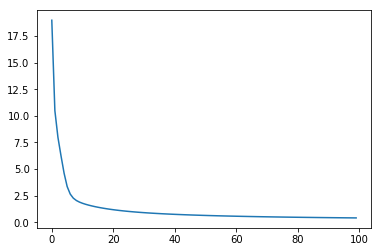

In [10]:
layers, error_history = ae.trainAE(linear, .1, 100,AEdata)
plt.plot(range(100), error_history)
plt.show()

In [11]:
layers[1]['activations'].T.shape
loss = ((AEdata.T - layers[1]['activations'].T) ** 2).mean()
loss

0.014393347616938022

## Part-2: (15 points) 
### Use the reduced dimensions from all the techniques in the first part and perform K-means clustering with k equal to five(number of classes in the data). Also calculate the purity of clusters with given class label.

Number of elements in Cluster 0 : 2978
Number of elements in Cluster 1 : 6521
Number of elements in Cluster 2 : 6940
Number of elements in Cluster 3 : 5341
Number of elements in Cluster 4 : 3218
Cluster 0 Purity
0.458025520483546


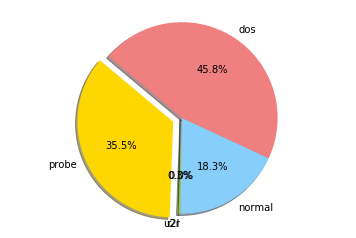

Cluster 1 Purity
0.9305321269743905


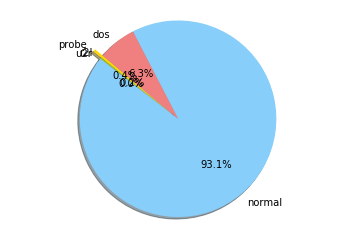

Cluster 2 Purity
0.9822766570605187


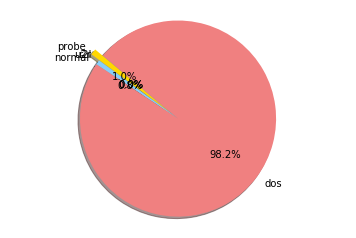

Cluster 3 Purity
0.7882419022654934


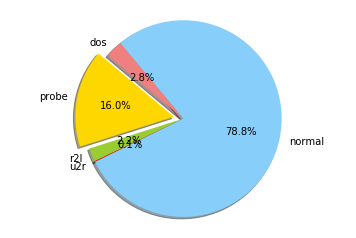

Cluster 4 Purity
0.7728402734617775


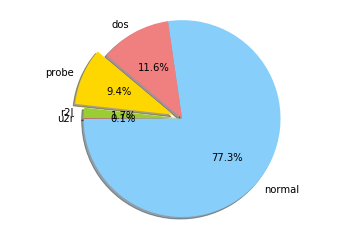

In [12]:
import kmeans
kmeans.run1(layers[1]['activations'].T,y)

## Part-3 (15 points) 
### Perform GMM (with five Gaussian) on the reduced dimensions from first part and calculate the purity of clusters. You can use python library for GMM.

Number of elements in Cluster 0 : 6180
Number of elements in Cluster 1 : 6970
Number of elements in Cluster 2 : 2253
Number of elements in Cluster 3 : 4288
Number of elements in Cluster 4 : 5307
Cluster 0 Purity
1.0


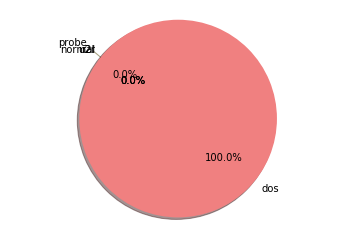

Cluster 1 Purity
0.9776183644189383


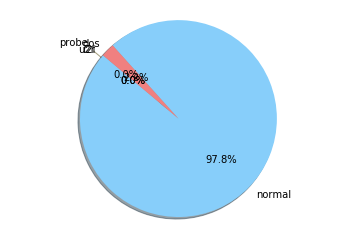

Cluster 2 Purity
0.5903240124278739


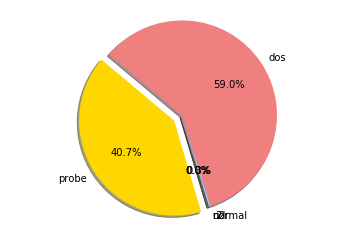

Cluster 3 Purity
0.7495335820895522


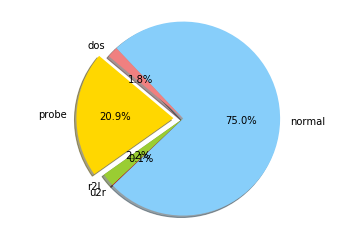

Cluster 4 Purity
0.6274731486715659


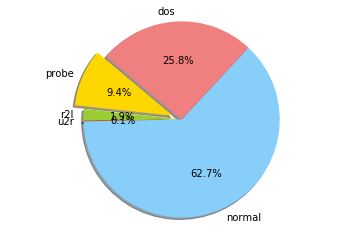

In [13]:
kmeans.run2(layers[1]['activations'].T,y)

## Part-4: (15 points) 
### Perform Hierarchical clustering with single-linkage and five clusters on the reduced dimensions from all the techniques in the first part and calculate the purity of clusters.You can use python library for hierarchical clustering.

2971
6530
6278
6941
2278
Number of elements in Cluster 0 : 2971
Number of elements in Cluster 1 : 6530
Number of elements in Cluster 2 : 6278
Number of elements in Cluster 3 : 6941
Number of elements in Cluster 4 : 2278
Cluster 0 Purity
0.4591046785594076


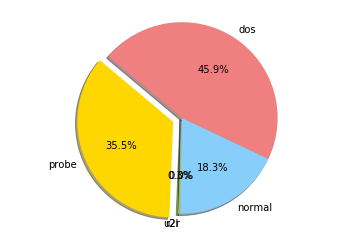

Cluster 1 Purity
0.8978560490045941


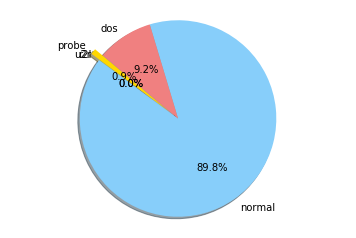

Cluster 2 Purity
0.8188913666772858


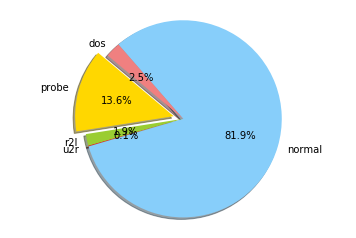

Cluster 3 Purity
0.9831436392450655


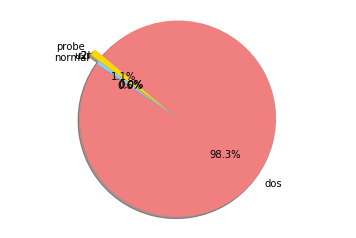

Cluster 4 Purity
0.7796312554872695


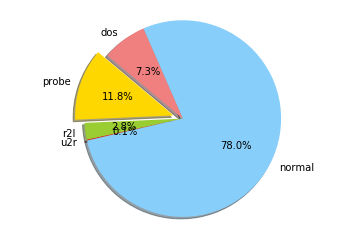

In [14]:
kmeans.run3(layers[1]['activations'].T,y)

## Part-5: (5 points) 
### Create a pie chart comparing purity of different clustering methods you have tried for all classes for the different autoencoders.

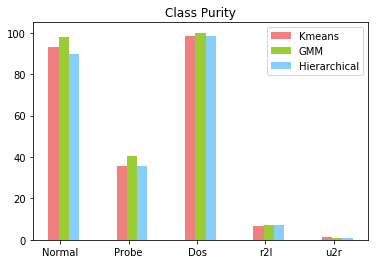

In [41]:
import numpy as np
import matplotlib.pyplot as plt
N = 5
kmeans = (93.1,35.5,98.2, 6.6, 1.3)
fig, ax = plt.subplots()
ind = np.arange(N)    
width = 0.3         
p1 = ax.bar(ind, kmeans, width/2, color='lightcoral', bottom=0)
gmm = (97.8, 40.7, 100,7,1)
p2 = ax.bar(ind + width/2, gmm, width/2,
            color='yellowgreen', bottom=0)
gglo = (89.8, 35.5, 98.3,7,1)
p3 = ax.bar(ind + width, gglo, width/2,
            color='lightskyblue', bottom=0)
ax.set_title('Class Purity')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels(('Normal', 'Probe', 'Dos', 'r2l', 'u2r'))
ax.legend((p1[0], p2[0],p3[0]), ('Kmeans', 'GMM',"Hierarchical"))
ax.yaxis.set_label("Percentage")
ax.autoscale_view()
plt.show()

### b. Sigmoid autoencoder

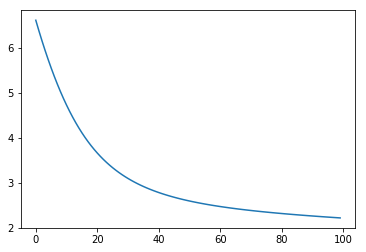

In [16]:
l=100
layers, error_history = ae.trainAE(sigmoid, 0.1, l,AEdata)
plt.plot(range(l), error_history)
plt.show()

In [17]:
layers[1]['activations'].T.shape
loss = ((AEdata.T - layers[1]['activations'].T) ** 2).mean()
loss

0.07641619438414096

### Using Kmeans

Number of elements in Cluster 0 : 2376
Number of elements in Cluster 1 : 10066
Number of elements in Cluster 2 : 6943
Number of elements in Cluster 3 : 3419
Number of elements in Cluster 4 : 2194
Cluster 0 Purity
0.5740740740740741


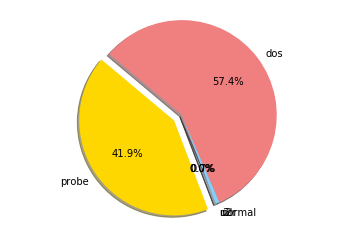

Cluster 1 Purity
0.9744685078482018


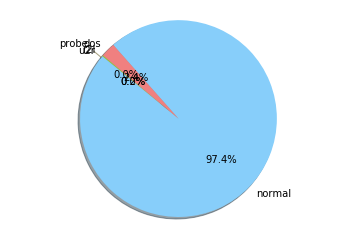

Cluster 2 Purity
0.9812761054299294


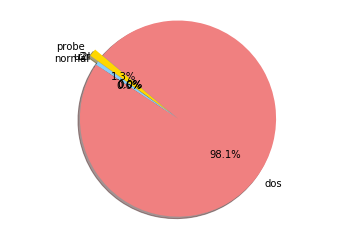

Cluster 3 Purity
0.7961392219947353


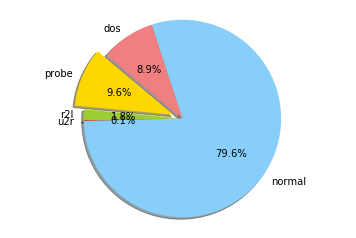

Cluster 4 Purity
0.410665451230629


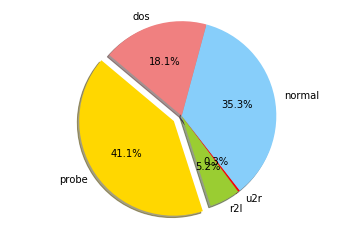

In [19]:
import kmeans
kmeans.run1(layers[1]['activations'].T,y)

### Using GMM

Number of elements in Cluster 0 : 5576
Number of elements in Cluster 1 : 6360
Number of elements in Cluster 2 : 2330
Number of elements in Cluster 3 : 7256
Number of elements in Cluster 4 : 3476
Cluster 0 Purity
0.6802367288378766


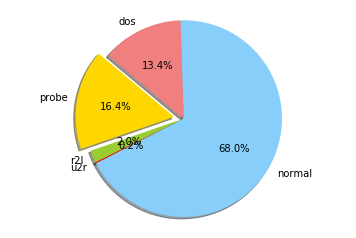

Cluster 1 Purity
1.0


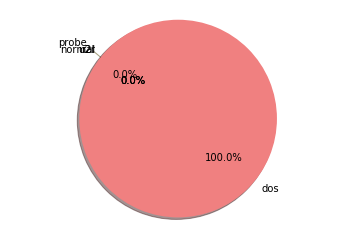

Cluster 2 Purity
0.5815450643776824


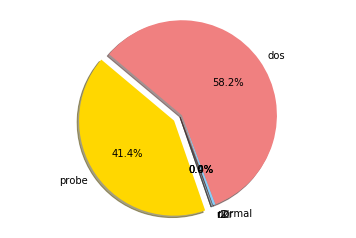

Cluster 3 Purity
0.994625137816979


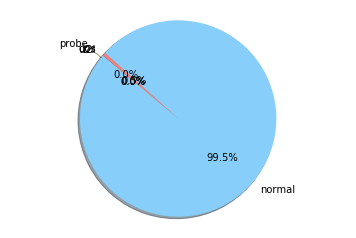

Cluster 4 Purity
0.6743383199079401


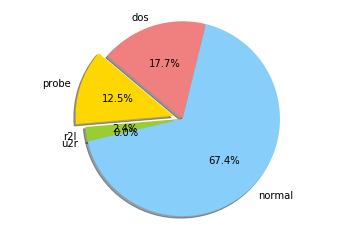

In [20]:
kmeans.run2(layers[1]['activations'].T,y)

### Using Hierarchical

4328
9957
1972
6950
1791
Number of elements in Cluster 0 : 4328
Number of elements in Cluster 1 : 9957
Number of elements in Cluster 2 : 1972
Number of elements in Cluster 3 : 6950
Number of elements in Cluster 4 : 1791
Cluster 0 Purity
0.7114140480591498


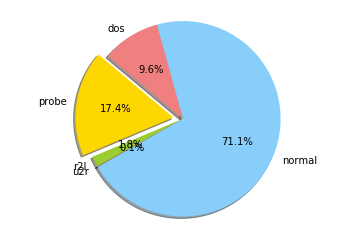

Cluster 1 Purity
0.9806166516018882


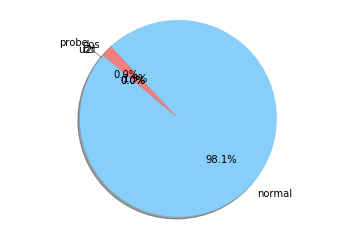

Cluster 2 Purity
0.6896551724137931


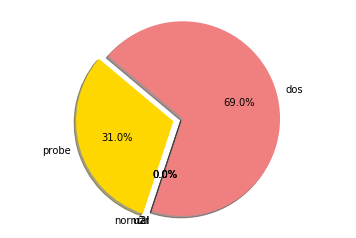

Cluster 3 Purity
0.9794244604316547


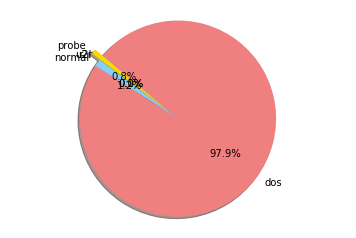

Cluster 4 Purity
0.4963707426018984


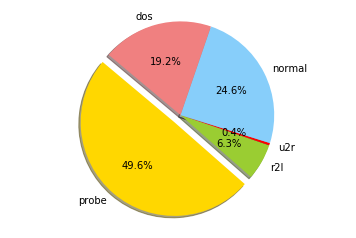

In [21]:
kmeans.run3(layers[1]['activations'].T,y)

### Comparison

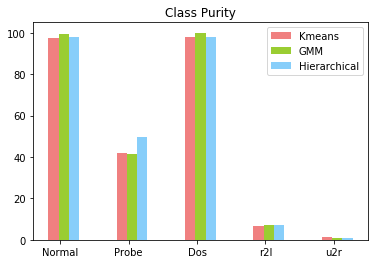

In [42]:
import numpy as np
import matplotlib.pyplot as plt
N = 5
kmeans = (97.4,41.8,98, 6.6, 1.3)
fig, ax = plt.subplots()
ind = np.arange(N)    
width = 0.3         
p1 = ax.bar(ind, kmeans, width/2, color='lightcoral', bottom=0)
gmm = (99.5, 41.2,100,7,1)
p2 = ax.bar(ind + width/2, gmm, width/2,
            color='yellowgreen', bottom=0)
gglo = (98.1, 49.6, 97.9,7,1)
p3 = ax.bar(ind + width, gglo, width/2,
            color='lightskyblue', bottom=0)
ax.set_title('Class Purity')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels(('Normal', 'Probe', 'Dos', 'r2l', 'u2r'))
ax.legend((p1[0], p2[0],p3[0]), ('Kmeans', 'GMM',"Hierarchical"))
ax.yaxis.set_label("Percentage")
ax.autoscale_view()
plt.show()

### b. ReLU autoencoder

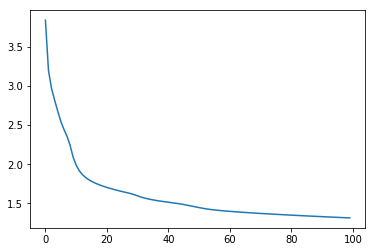

In [23]:
layers, error_history = ae.trainAE(relu, .1, 100,AEdata)
plt.plot(range(100), error_history)
plt.show()

In [24]:
layers[1]['activations'].T.shape
loss = ((AEdata.T - layers[1]['activations'].T) ** 2).mean()
loss

0.04537295212914022

### Using Kmeans

Number of elements in Cluster 0 : 6785
Number of elements in Cluster 1 : 9807
Number of elements in Cluster 2 : 2505
Number of elements in Cluster 3 : 3311
Number of elements in Cluster 4 : 2590
Cluster 0 Purity
0.9951363301400148


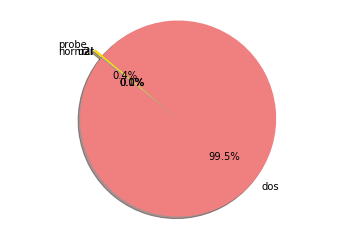

Cluster 1 Purity
0.9531966962373815


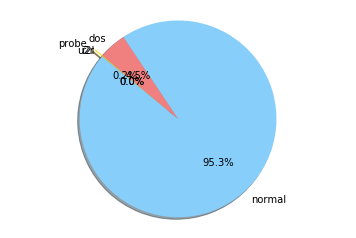

Cluster 2 Purity
0.7325349301397206


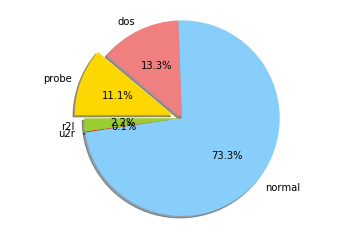

Cluster 3 Purity
0.6224705527031108


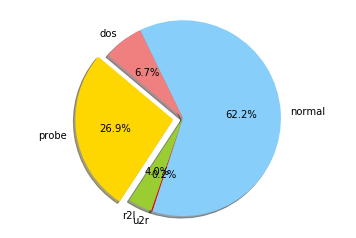

Cluster 4 Purity
0.5277992277992278


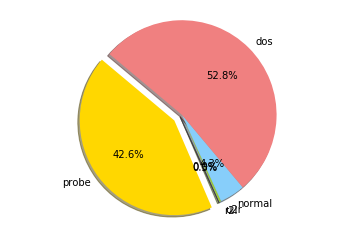

In [25]:
import kmeans
kmeans.run1(layers[1]['activations'].T,y)

### Using GMM

Number of elements in Cluster 0 : 8426
Number of elements in Cluster 1 : 6416
Number of elements in Cluster 2 : 2892
Number of elements in Cluster 3 : 4342
Number of elements in Cluster 4 : 2922
Cluster 0 Purity
0.9748397816282933


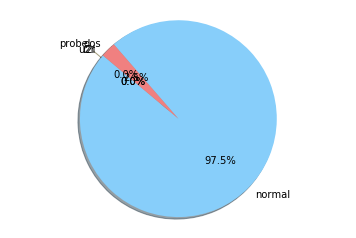

Cluster 1 Purity
1.0


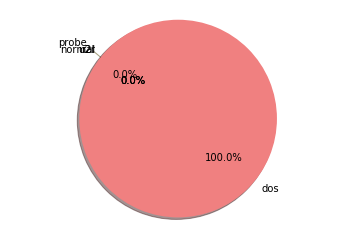

Cluster 2 Purity
0.4847856154910097


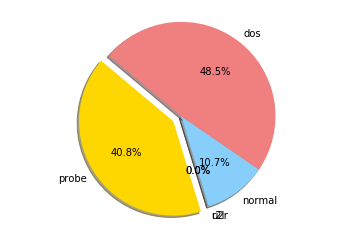

Cluster 3 Purity
0.6646706586826348


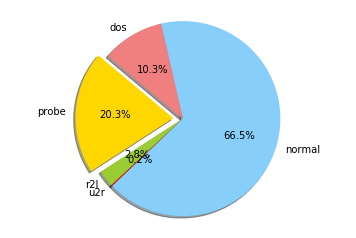

Cluster 4 Purity
0.6690622861054073


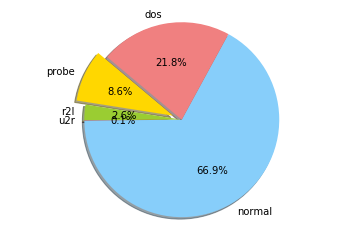

In [26]:
kmeans.run2(layers[1]['activations'].T,y)

### Using Hierarchical

3903
8686
6763
2614
3032
Number of elements in Cluster 0 : 3903
Number of elements in Cluster 1 : 8686
Number of elements in Cluster 2 : 6763
Number of elements in Cluster 3 : 2614
Number of elements in Cluster 4 : 3032
Cluster 0 Purity
0.6477068921342557


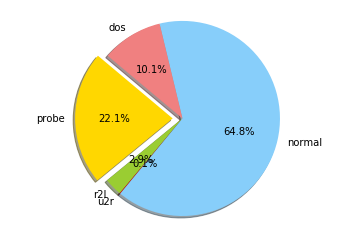

Cluster 1 Purity
0.9618927008979967


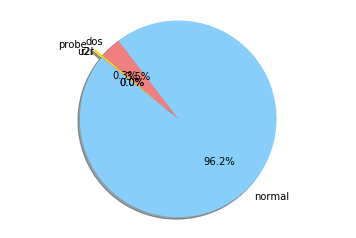

Cluster 2 Purity
0.995564098772734


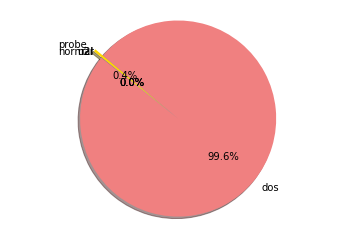

Cluster 3 Purity
0.521805661820964


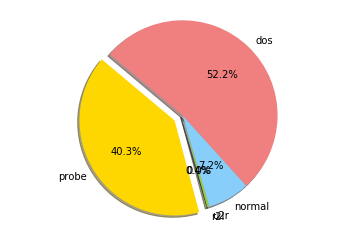

Cluster 4 Purity
0.7556068601583114


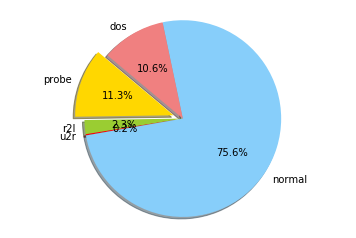

In [27]:
kmeans.run3(layers[1]['activations'].T,y)

### Comparison

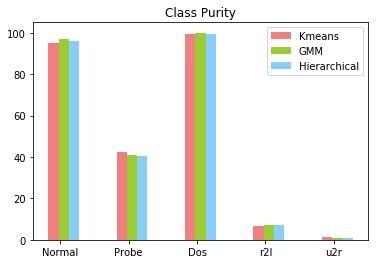

In [43]:
import numpy as np
import matplotlib.pyplot as plt
N = 5
kmeans = (95,42.6,99.5, 6.6, 1.3)
fig, ax = plt.subplots()
ind = np.arange(N)    
width = 0.3         
p1 = ax.bar(ind, kmeans, width/2, color='lightcoral', bottom=0)
gmm = (97, 40.8, 100,7,1)
p2 = ax.bar(ind + width/2, gmm, width/2,
            color='yellowgreen', bottom=0)
gglo = (96, 40.6, 99.6,7,1)
p3 = ax.bar(ind + width, gglo, width/2,
            color='lightskyblue', bottom=0)
ax.set_title('Class Purity')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels(('Normal', 'Probe', 'Dos', 'r2l', 'u2r'))
ax.legend((p1[0], p2[0],p3[0]), ('Kmeans', 'GMM',"Hierarchical"))
ax.yaxis.set_label("Percentage")
ax.autoscale_view()
plt.show()

### Deep Autoencoders where you increase the number of hidden layers and use non-linear activation functions.

In [29]:
def initialize_model():
    return [new_layer(29, 20),new_layer(20, 14),new_layer(14, 20),new_layer(20, 29)]

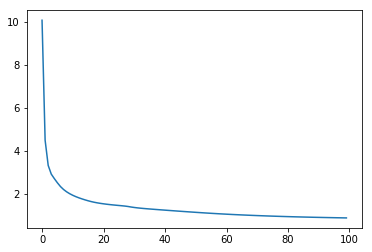

In [30]:
l=100
layers, error_history = trainAE(relu, 0.1, l)
plt.plot(range(l), error_history)
plt.show()

In [31]:
layers[3]['activations'].T.shape
loss = ((AEdata.T - layers[3]['activations'].T) ** 2).mean()
loss

0.030588861128015243

In [32]:
def initialize_model():
    return [new_layer(29, 24),new_layer(24, 19),new_layer(19, 14),new_layer(14, 19),new_layer(19, 24),new_layer(24, 29)]

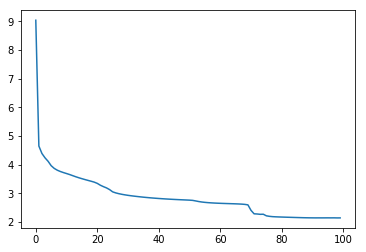

In [33]:
l=100
layers, error_history = trainAE(relu, 0.1, l)
plt.plot(range(l), error_history)
plt.show()

In [34]:
layers[5]['activations'].T.shape
loss = ((AEdata.T - layers[5]['activations'].T) ** 2).mean()
loss

0.0736724211284388

## Question 2 Part-2: (10 points) Gaussian Mixture Model based Density Estimation:
### Use Bayesian Information Criteria to find the number of GMM components we should use Apply GMM using the using the above number of components

## Part-3: (10 points) 
### Draw 48 new points in the projected spaces using both the above generative models. Use Inverse transform of PCA to construct new digits Plot these points from both the models.

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=9, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


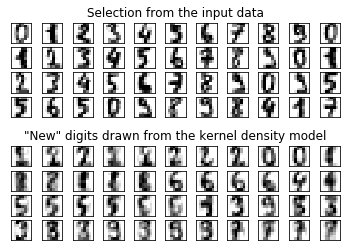

In [35]:
import gmm
gmm.run1()

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


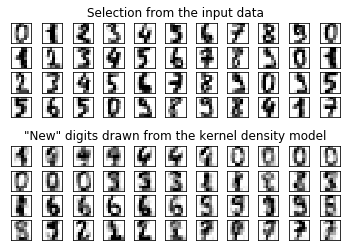

In [36]:
gmm.run2()

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=9, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


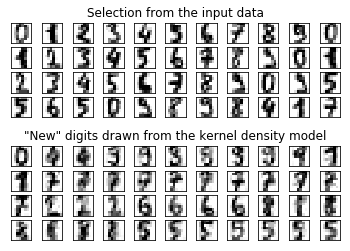

In [37]:
gmm.run3()

## Question 2 Part-1: (10 points) Kernel Density Estimation:
### Use grid search cross validation on the reduced feature data to optimize bandwidth. Compute Kernel Density Estimate

## Part-3: (10 points) 
### Draw 48 new points in the projected spaces using both the above generative models. Use Inverse transform of PCA to construct new digits Plot these points from both the models.

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best bandwidth: 3.79269019073225


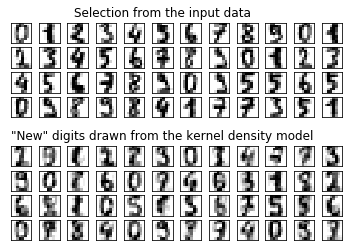

In [38]:
import kde
kde.run1()

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best bandwidth: 2.9763514416313175


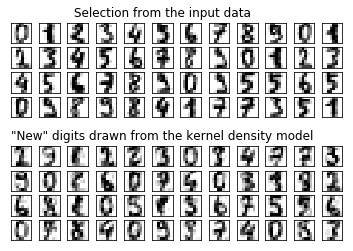

In [39]:
kde.run2()

best bandwidth: 2.9763514416313175


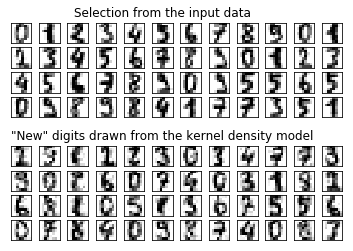

In [40]:
kde.run3()